# Image Basics

Images are extracted in to `numpy` multidimensional arrays
(=the `ndarray` object AKA the n-dimensional array).
This will definitely comes in handy
and avoids the need to mess about directly with the images and their formats.
Renaming the imports is common for popular libraries,
So you will typically see `numpy` being renamed to `np`
and `imageio.v3` renamed as `iio`.

## Loading Images

"Scikit-image" has it's own way to load an image (`skimage.io.imread()`).
But underneath it uses `iio.imread()`,
we prefer this because it is more flexible and allows us to access
the meta data in the in the image.

In [3]:
%%time
%matplotlib widget

import imageio.v3 as iio
import numpy as np
from aqua_marina import file_finder_service

eight_path = file_finder_service.find_training_image('eight.tif')

eight = iio.imread(uri=eight_path)
assert isinstance(eight, np.ndarray)  # ndarray is an n-dimensional array object

print(eight.shape)
print(eight)

(5, 3)
[[0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 0. 0.]]
CPU times: user 1.5 ms, sys: 1.22 ms, total: 2.72 ms
Wall time: 1.88 ms


The `ndarray` is an n-dimensional array object

See that the coordinates are height then width.
left-hand coordinate system.
Also the image is just ones and zeros.

Display the image with `pyplot`.  Why are t

The subplots thing allows you to have multiple figures,
if you don't have multiple figures then it will default to one.

Image is 3 by 5 

We can see two colours.
This is a black and white image, but an artificial colour map has been
applied for ease o f 

Images use a different coordinate system
0,0 is in the top left.

The shape

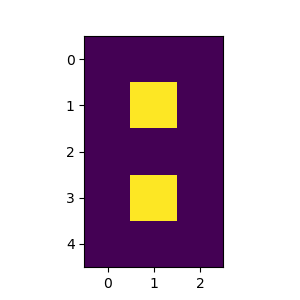

In [4]:
from matplotlib import pyplot

the_figure, the_axes = pyplot.subplots(figsize=(3,3))
the_axes.imshow(eight)

## Working with Pixels

Let's look at the pixels in the image.
Edit the image.
Then show it with the other one.

The pixels are addressed, Y first then X.
This is the "RYCX",
Rows are Y, and Columns are X.

Rycx is a prominent Belgian economist.
<https://francois.rycx.web.ulb.be/>.

(-0.5, 2.5, 4.5, -0.5)

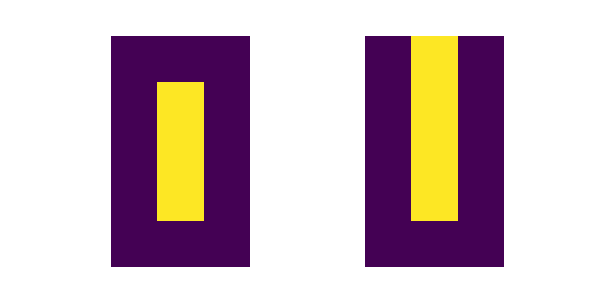

In [5]:
import copy

other_figure, other_axes = pyplot.subplot_mosaic([
    ['left', 'right']
], figsize=(6, 3))

zero = copy.deepcopy(eight)
zero[2,1] = 1.0
other_axes['left'].imshow(zero)
other_axes['left'].axis('off')  # Hide the axes

letter_u = copy.deepcopy(eight)
letter_u[0:4, 1] = 2.0
other_axes['right'].imshow(letter_u)
other_axes['right'].axis('off')  # Hide the axes

## More Colours

Previously we were using 0 to 1, but typically 256 are used to express intensity.

0 is black  255 is white
or if RGB
0 is not there but 255 is all the colour

Note the use of matrix arithmetic so if the matrix is multiplied by a number,
then every cell is multiplied by that number.

In [6]:
three_colour_eight = copy.deepcopy(eight)
three_colour_eight = three_colour_eight * 128
three_colour_eight[2, :] = 255
print(three_colour_eight)

[[  0.   0.   0.]
 [  0. 128.   0.]
 [255. 255. 255.]
 [  0. 128.   0.]
 [  0.   0.   0.]]


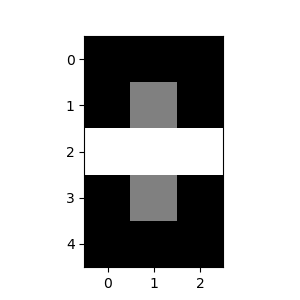

In [7]:
yet_another_figure, yet_another_axes = pyplot.subplots(figsize=(3,3))
yet_another_axes.imshow(three_colour_eight, cmap=pyplot.cm.gray)

## Even More Colours

Images can be generated.
The pseudo randomizer which is deterministic
so we get the same sequence of numbers.

randint will sample the range 0 to 255 in this case

[[[116  85  57]
  [128 109  94]
  [214  44  62]
  [219 157  21]]

 [[ 93 152 140]
  [246 198 102]
  [ 70  33 101]
  [  7   1 110]]

 [[225 124 229]
  [154 194 176]
  [227  63  49]
  [144 178  54]]

 [[123 180  93]
  [120   5  49]
  [166 234 142]
  [ 71  85  70]]]


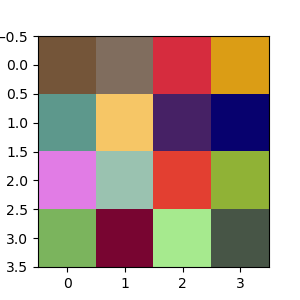

In [8]:
import numpy as np

pseudo_random = np.random.RandomState(seed=2021)
checker_board = pseudo_random.randint(0, 255, size=(4,4,3))
print(checker_board)

the_figure, the_axes = pyplot.subplots(figsize=(3,3))
the_axes.imshow(checker_board)


In [9]:
upper_right_square = checker_board[1,3,:]
red = upper_right_square[0]
green = upper_right_square[1]
blue = upper_right_square[2]

print(f"Red: {red}, Green: {green}, Blue: {blue}")



Red: 7, Green: 1, Blue: 110


Because the three colour channels are held in an array we can do matrix arithmetic on them to extract colours.
This is going to be handy for extracting the colours of leaves etc...
This is 24-bit RGB colour.

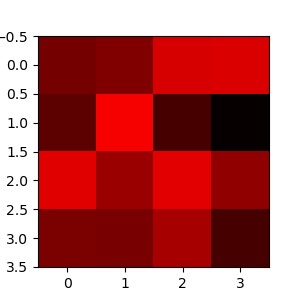

In [12]:
red_filter = np.array([1, 0, 0])  # Red only, RGB
red_channel_only = checker_board * red_filter
the_figure, the_axes = pyplot.subplots(figsize=(3,3))
the_axes.imshow(red_channel_only)

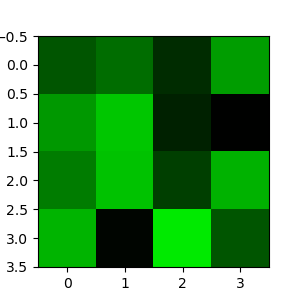

In [13]:
green_filter = np.array([0, 1, 0])  # Green only, RGB
green_channel_only = checker_board * green_filter
the_figure, the_axes = pyplot.subplots(figsize=(3,3))
the_axes.imshow(green_channel_only)